# Comparing time-series similarity using some basic examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

# Examining Daily Sales over time using Moving Averages

In [4]:
import dtcj

In [5]:
merged = dtcj.load_merged()

In [6]:
class SalesTable:
    
    def __init__(self, 
             df,
             sales_col='SALES_VALUE',
             customer_id='household_key',
             dt_col='datetime',
            ):
        '''
        ### SalesTable class to perform timeseries comparison of the purchasing pattern of households 
        ### across multiple sales categories
        
        Accept:
            a pandas DataFrame as `df`; must also pass all default parameters.

        Since this is a 'sales table', we can assume three columns:
            `sales value`; a sales value column
            `customer id`; customer identifier
            `date time`; a date and time of purchase
            
        note: functionality which is appropriate for multiple columns of sales (ie. plotting multiple sales categories)
              should include a list-based parameter to allow for comparison of additional columns (categories)
              
              alternatively, separate 'salestable' objects could be created to assess datasets across distinct aspects
        
        We're gonna try to make this transactions table tell us something about our customers.
        Any number of simple calculations could be stored about this table as statistics; as well as visualizations,
        transformations, returned feature/target spaces, class label process etc.


        '''
        # identifying argument-based attributes: sales, ID, datetime column names
        self.sales_col = sales_col
        self.customer_id =  customer_id
        self.dt_col = dt_col
        
        # loading dataframe to memory... ( :( )
        self.df = df
        # list customer ids set using `customer_id` column for reference
        self.customer_ids = list(self.df[self.customer_id].unique()) # wrap these two in a load_df wrapper/setter?


    # sales over time plots
    def sales_over_time(self, 
                    sales_cols=['SALES_VALUE',],
                    resample_rule = 'BQ', # only works for datetime.
                    hh_keys=None
                       ):
        """return the sales series for one or many given `customer_id`s
 
        By segmenting this way, I can produce timeseries by sample size and resample group
        such as to form a tensor/matrix of sales over time for various categories

        The similarity across matrices will then represent purchase behaviour. 

        We could additionally provide RFM attributes or other variables over time to add depth to our matrix of timeseries points;
            -> null errors with churn, customer acquisition

        This would provide an accurate representation of **purchase behaviour over time**, such as noticeable by our data...

        We don't need to use deep learning to compare these behaviours against direct marketing campaigns
                -> we are not investigating whether customers knew about the sales -->
                    -> we have a small sample group of targeted households, is their behaviour noticeably affected
                        -> versus a control group of similar-purchasing-households? similar demographics?


        """

        # allow list-based filtering...
        if hh_keys==None:
            hh_keys = self.customer_ids


        ## record fails and outputs
        idx = []
#         fails = []
        output = pd.DataFrame()
        for hh in hh_keys:
            try:
                for col in sales_cols:
#                 print(col)
#                     idx.append(f'{resample_rule}-{col}-{hh}')?
#                     or should the datetime axis be renamed?

                    idx.append(hh)
                
                    output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[col].sum(), ignore_index=True)
            except:
#                 fails.append(f'{col}-{hh}')
#                 fails.append(hh)
                pass
#             else:
#                 idx.append(f'{self.sales_col}-{hh}')
#                 try:
#                     output=output.append(self.df[self.df[self.customer_id]==hh].resample(resample_rule, on=self.dt_col)[sales_cols[0]].sum(), ignore_index=True)
#                 except:
#                     fails.append(f'{self.sales_col}-{hh}')
#                     pass
                
                
    #     assert all(hh_keys == list(output.index)) ## what a terrible assertion dude..don't pass thru constructor

        output.index = idx
        output.index.name='household_key'
#         output.fillna(0, inplace=True) ### these nulls indicate non-existent household??
                                        ### there are other 0's in the data, between full columns.

        return output
    
#     def __repr__(self):
#         return pprint.pprint(f"Transactions Table Object\nSales Column : {self.sales_col}\nCustomer ID Column : {self.customer_id}\nDateTime Column : {self.dt_col}\nShape of DF : {self.df.shape}\nNumber of Customers : {len(self.customer_ids)}\
#             ")


In [7]:
Merged = SalesTable(merged)

In [8]:
# hh_agg = dtcj.load_hh_agg(Merged.df)


# filter_list = list(hh_agg[hh_agg['RFM']>13].index)

In [15]:
daily_hh = Merged.sales_over_time(hh_keys=range(1,11), resample_rule='D')
                                 ### grabbing only the first 10 households. null values can be noted below

In [16]:
daily_hh

,2004-07-01,2004-07-02,2004-07-03,2004-07-04,2004-07-05,2004-07-06,2004-07-07,2004-07-08,2004-07-09,2004-07-10,...,2006-02-18,2006-02-19,2006-02-20,2006-02-21,2006-02-22,2006-02-23,2006-02-24,2006-02-25,2006-02-26,2006-02-27
household_key,,,,,,,,,,,,,,,,,,,,,
1,53.45,0.0,0.0,0.00,0.0,0.0,0.00,26.76,0.0,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,81.29,NaN
2,NaN,NaN,22.7,0.00,0.0,0.0,0.00,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.00,0.0,36.38,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,126.24,0.0,0.0,0.00,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.00,0.0,12.99,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,33.05,61.99
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,0.0,111.79,0.0,0.00,0.0,0.0,0.00,49.02
8,18.66,0.0,0.0,0.00,17.3,0.0,8.82,0.00,0.0,0.00,...,0.0,144.69,0.0,0.00,0.0,0.00,0.0,0.0,52.66,NaN
9,NaN,NaN,NaN,15.54,0.0,0.0,0.00,0.00,0.0,15.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
daily_hh.fillna(0, inplace=True)

In [19]:
daily_hh.index
# only the first 10 households, as passed in the method call.

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='household_key')

To examine these daily sales totals as a timeseries, one way to normalize our input is to utilize moving averages. Another is to use the difference from the mean, or the previous day. 

Based on our previous timeseries notebook, we know that in general there is a 2-4 day negative correlation, as well as a 6-8 day positive correlation. 

<AxesSubplot:>

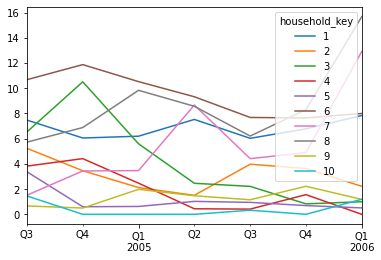

In [20]:
daily_hh.T.resample('BQ').mean().plot()

# Below we can see the monthly sales for our ten households.

In [24]:
rolling_4_hh = daily_hh.T.rolling(4).mean()

<AxesSubplot:ylabel='Frequency'>

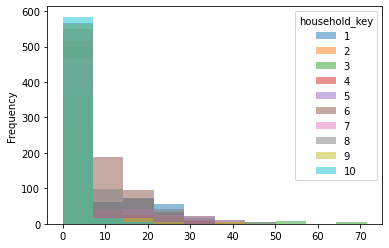

In [25]:
rolling_4_hh.plot(kind='hist', alpha=0.5)

<AxesSubplot:>

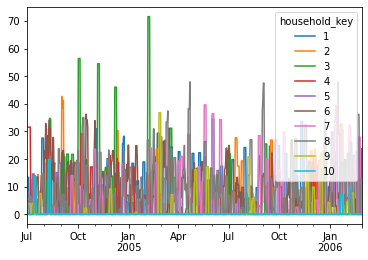

In [26]:
rolling_4_hh.plot()

In the plot above, we can see with more definition where spikes in spending occurred. We can then examine for correlations with advertising campaigns that occurred during those 4-day windows.

<AxesSubplot:>

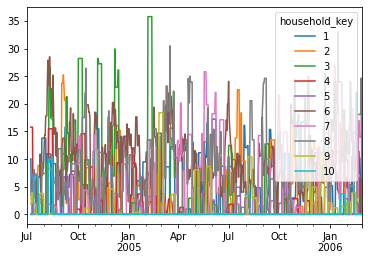

In [27]:
rolling_8_hh = daily_hh.T.rolling(8).mean()
rolling_8_hh.plot()

These sorts of choices about developing signals seem to be hugely important in the realm of timeseries (and all causal/event-driven phenomena!).

<AxesSubplot:>

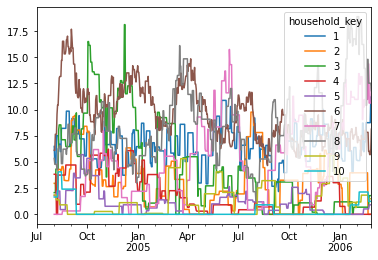

In [222]:
rolling_33_hh = daily_hh.T.rolling(33).mean()
rolling_33_hh.plot()

Since we're using the simple moving average value, let's examine using the MinMaxScaler first.

Alternatively, we could use the '.diff()' difference from a previous day or value; or difference from a moving average. These values would have negative values; and therefore I would predict the standardscaler might perform better. 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
scaled = MinMaxScaler().fit_transform(rolling_33_hh.dropna())
scaled

array([[0.47700707, 0.30319297, 0.11412044, ..., 0.22861482, 0.33009447,
        0.40715032],
       [0.29798707, 0.30319297, 0.11412044, ..., 0.19641409, 0.33009447,
        0.40715032],
       [0.29798707, 0.30319297, 0.11412044, ..., 0.19641409, 0.33009447,
        0.40715032],
       ...,
       [0.72773554, 0.        , 0.09848865, ..., 0.63790574, 0.26504723,
        0.30512017],
       [1.        , 0.        , 0.09848865, ..., 0.63602478, 0.26504723,
        0.30512017],
       [1.        , 0.        , 0.09848865, ..., 0.59714577, 0.26504723,
        0.30512017]])

In [227]:
results = pd.DataFrame(scaled, index=rolling_33_hh.dropna().index, columns= rolling_33_hh.columns)

Using 7 days as a differential (below) introduces a 2-week purchasing period bias of some sort into our findings? 1-day differential will be similar... We've already taken 7-day moving average as the window of choice. At first glance that seems ok -- it allows us to group more frequently-purchasing households more closely?

<AxesSubplot:>

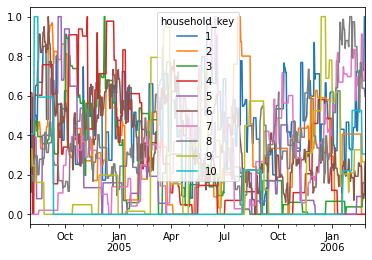

In [228]:
results.plot()

<AxesSubplot:xlabel='household_key', ylabel='household_key'>

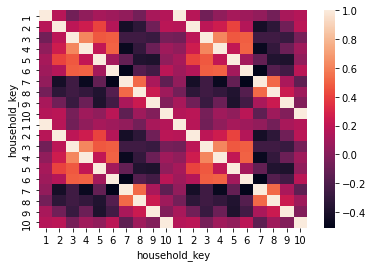

In [241]:
sns.heatmap(pd.concat([results, daily_hh.T.rolling(33).mean().dropna()], axis=1).corr())

We've managed to keep our number of data points relatively protected by averaging the sales over 33 days at a daily level.

Above in the heatmap we can see that the scaled values directly correlate with the unscaled data points.

In [242]:
import seaborn as sns

In [ ]:
results.corr()

<AxesSubplot:xlabel='household_key', ylabel='household_key'>

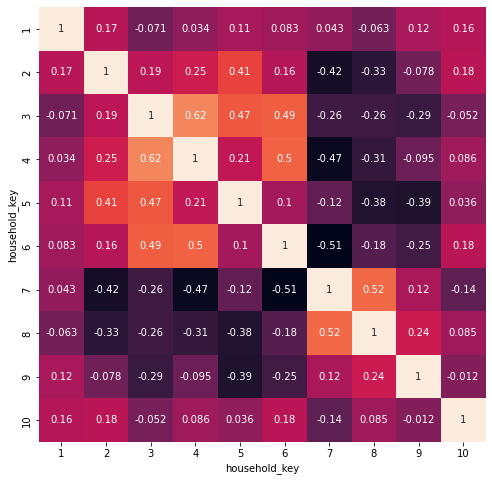

In [258]:
plt.figure(figsize=(8,8))
sns.heatmap(results.corr(), vmax=1, annot=True, cbar=False)

<AxesSubplot:>

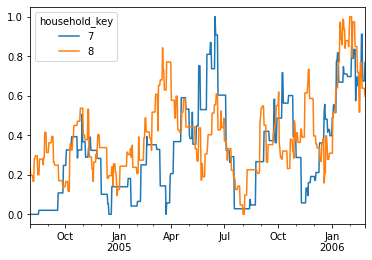

In [272]:
results.loc[:,[7,8]].plot()

33-day rolling mean of daily sales for households 7 and 8 have a correlation of 0.52; we can see how closely they match each other after scaling. Their sales totals are below;

In [273]:
daily_hh.loc[[7,8],:].sum(axis=1)

household_key
7    3170.21
8    5075.29
dtype: float64

<AxesSubplot:>

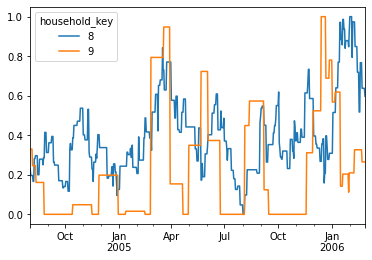

In [275]:
results.loc[:,[8,9]].plot()

33-day rolling mean of daily sales for households 8 and 9 have a correlation of 0.12. We can see that similar purchase behaviour is exhibited in some places, but the frequency of purchase seems to be much lower for household 9. The sums of their purchases are below;

In [276]:
daily_hh.loc[[8,9],:].sum(axis=1)

household_key
8    5075.29
9     797.42
dtype: float64

One group that stands out above is some mutual correlations between several households; 3 with 4, 5, and 6, respectively.

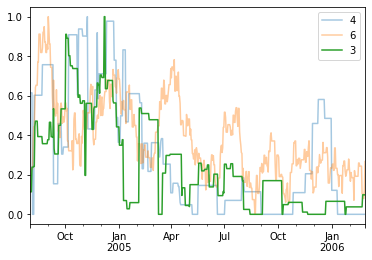

In [296]:
results.loc[:,[4,6]].plot(alpha=0.4)
plt.plot(results.loc[:,[3]],alpha=1, label=3)
plt.legend();

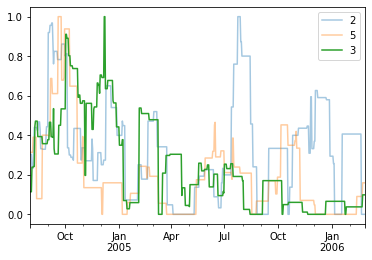

In [295]:
results.loc[:,[2,5]].plot(alpha=0.4)
plt.plot(results.loc[:,[3]],alpha=1, label=3)
plt.legend()

<AxesSubplot:>

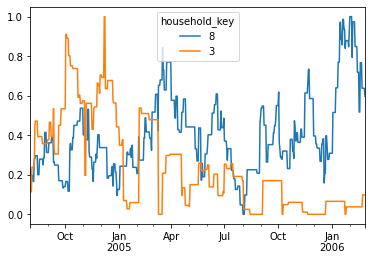

In [263]:
results.iloc[:,[7,2]].plot()
# households 7 and 2 have a negative correlation; they behave in opposite ways

The loop below creates a dictionary, output, and then iterates through the correlation matrix.

For each household, it records which other households had a similar min-maxed sales value, at the same time (over a 33-day average period). This is a threshold which can be set in the lowest level of the loop:

In [309]:
output = dict()
for col in results.corr():
    output[col] = []
    for idx, val in results.corr()[col].iteritems():
#         print(idx,val)
        if val > 0.2: # threshold here
            output[col].append((idx, val))

In [311]:
[(len(x)) for x in output.values()]

[1, 3, 4, 5, 4, 3, 2, 3, 2, 1]

So, household 4 has the most correlations with other households, above a threshold of 0.2. We're lucky that we didn't have to deal with indexing errors (we had household_key in the range 1-10), but that's something to consider. Note the distinction between referencing integer-based row ids using .loc versus .iloc; .T is very useful here.

Let's take all of the above and form a function to perform the whole process on our data.

In [322]:
from collections import defaultdict

In [313]:
def create_timeseries_average(SalesTable, hh_keys=None, resample_rule='D', rolling=33):
    from sklearn.preprocessing import MinMaxScaler

    if hh_keys == None:
        hh_keys = SalesTable.customer_ids
    
    # create daily_hh
    daily_hh = SalesTable.sales_over_time(hh_keys=hh_keys, resample_rule=resample_rule).fillna(0) 
   
    rolling_hh = daily_hh.T.rolling(rolling).mean()
    

    scaled = MinMaxScaler().fit_transform(rolling_hh.dropna())
    results = pd.DataFrame(scaled, index=rolling_hh.dropna().index, columns= rolling_hh.columns)
    
    return results
    

In [317]:
results = create_timeseries_average(Merged, hh_keys=range(200,500), rolling=33)

In [319]:
def process_timeseries_average(results, threshold=0.2):
    output = defaultdict(list)

    if threshold > 0: # positive threshold
        for col in sorted(results.corr()):
            for idx, val in results.corr()[col].iteritems():
        #         print(idx,val)
                if idx != col:

                    if val > threshold: # threshold here
                        output[col].append(idx)

    
    elif threshold < 0: # negative threshold
        for col in sorted(results.corr()):
            for idx, val in results.corr()[col].iteritems():
        #         print(idx,val)
                if idx != col:
                    if val < threshold: # threshold here
                        output[col].append(idx)

                    
    return output

In [327]:
output_20 = process_timeseries_average(results)
output_20

defaultdict(list,
            {200: [201,
              205,
              207,
              209,
              215,
              216,
              221,
              227,
              233,
              238,
              243,
              245,
              247,
              248,
              249,
              250,
              253,
              254,
              257,
              273,
              274,
              275,
              277,
              280,
              283,
              285,
              286,
              289,
              293,
              296,
              297,
              304,
              306,
              307,
              308,
              314,
              315,
              316,
              329,
              332,
              336,
              337,
              345,
              348,
              349,
              350,
              353,
              361,
              367,
              371,
              375,
        

In [335]:
[(x, len(output_20[x])) for x in output_20]

[(200, 76),
 (201, 103),
 (202, 75),
 (203, 54),
 (204, 62),
 (205, 95),
 (206, 63),
 (207, 59),
 (208, 58),
 (209, 57),
 (210, 66),
 (211, 63),
 (212, 46),
 (213, 57),
 (214, 44),
 (215, 55),
 (216, 64),
 (217, 42),
 (218, 60),
 (219, 66),
 (220, 48),
 (221, 54),
 (222, 65),
 (223, 64),
 (224, 48),
 (225, 44),
 (226, 71),
 (227, 81),
 (228, 32),
 (229, 40),
 (230, 30),
 (232, 72),
 (233, 100),
 (234, 55),
 (235, 42),
 (236, 59),
 (237, 56),
 (238, 58),
 (239, 84),
 (240, 84),
 (241, 43),
 (242, 52),
 (243, 95),
 (244, 43),
 (245, 67),
 (246, 57),
 (247, 91),
 (248, 51),
 (249, 72),
 (250, 97),
 (251, 50),
 (252, 57),
 (253, 56),
 (254, 77),
 (255, 48),
 (256, 33),
 (257, 53),
 (258, 59),
 (259, 62),
 (260, 48),
 (261, 55),
 (262, 72),
 (263, 39),
 (264, 50),
 (265, 52),
 (266, 68),
 (267, 76),
 (268, 49),
 (269, 91),
 (270, 55),
 (271, 76),
 (272, 54),
 (273, 98),
 (274, 56),
 (275, 75),
 (276, 56),
 (277, 59),
 (278, 50),
 (279, 65),
 (280, 48),
 (281, 46),
 (282, 50),
 (283, 89),
 (

With a larger sample size, it appears that the correlation threshold may need to be raised. By looking for extremely similar sales series, we can begin the process of constructing groups?

In [336]:
output_85 = process_timeseries_average(results, threshold=0.85)

In [337]:
output_85

defaultdict(list,
            {233: [349],
             240: [435],
             271: [323],
             272: [284],
             284: [272],
             323: [271],
             349: [233],
             435: [240]})

Nice. That feels very responsive. Remember that this was for only a subsection of our households - 200 to 500. The time cost is already quite big, as we have an exponential number of calculations to make using this process.

Still, I feel I have not yet addressed the main issue; to generate a single matrix of household/timeseries axes with associated lateral and vertical similarity cluster labels or scores. To be able to see 'which households are making purchases like others, at a given time?'

In [341]:
len(results.T) # TODO: check that id errors do not occur ..............

300

---

In [373]:
class kmeans_model:
    
    def __init__(self, df):
        
        self.df = df
    
    
    def run_model(self, n_clusters=5):
        
        model = KMeans(n_clusters=n_clusters)
        model.fit(self.df)
        model_predictions = pd.Series(model.predict(self.df), index=self.df.index)
        model_predictions.name = f"KMeans_{n_clusters}_model_labels"
        return model_predictions

In [374]:
wrapper = kmeans_model(results.T)

In [378]:
labeled_results = results.T.join(wrapper.run_model())

<AxesSubplot:xlabel='household_key', ylabel='household_key'>

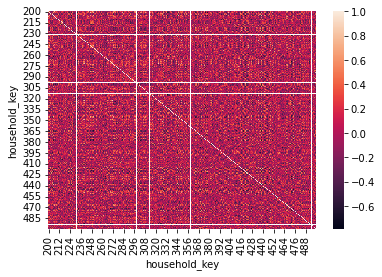

In [387]:
sns.heatmap(results.corr())

In [394]:
results.T[results.T.duplicated()].sum(axis=1)

household_key
298    0.0
313    0.0
359    0.0
494    0.0
dtype: float64

Wow, so 4 of our households made no purchases and therefore had the exact same time series..? This shouldn't be the case, with the truncations we made. I didn't remove enough outliers in my analysis.

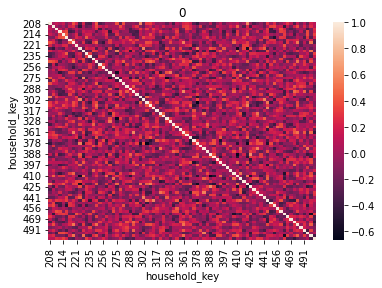

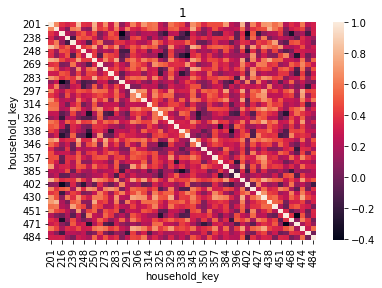

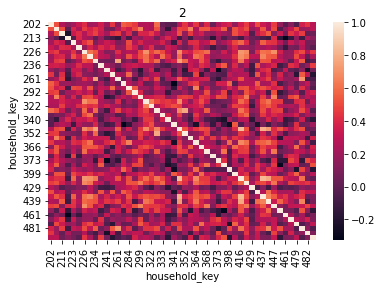

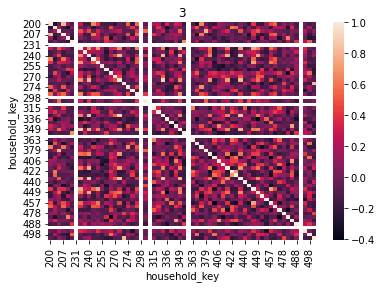

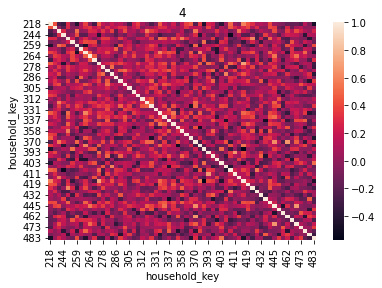

In [388]:
for i in range(5):
    sns.heatmap(labeled_results[labeled_results['KMeans_5_model_labels']==i].drop('KMeans_5_model_labels', axis=1).T.corr())
    plt.title(f'{i}')
    plt.show()

In [395]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [403]:
results.corr().isna().sum().sum()

2975

In [ ]:
cluster_corr(results.corr().fillna(0))

<AxesSubplot:xlabel='household_key', ylabel='household_key'>

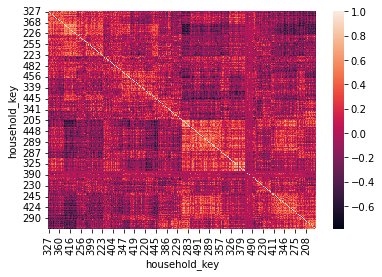

In [410]:
sns.heatmap(cluster_corr(results.corr().fillna(0)))

An idealistic thought would be that this defines some sort of perpendicular (triangular?) (a-)symmetry (sic?) along the variance of this correlation, where the negatively correlated households in the top right and bottom left are pushing away from one another as well. This is effectively a second PCA dimension?

We calculated the correlation coefficients on a fixed dataset -- introducing statistical noise could also assist in defining real patterns in the data.

<AxesSubplot:>

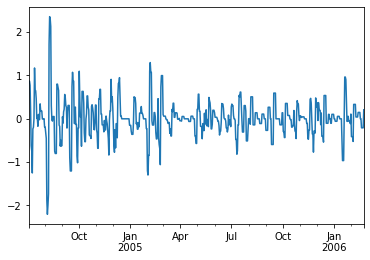

In [187]:
rolling_7_hh_mm_scaled.T.iloc[[1,2,3,4,8,9],:].mean().T.plot()

<AxesSubplot:>

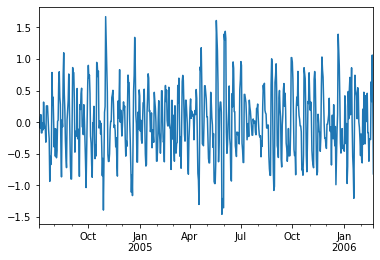

In [188]:
rolling_7_hh_mm_scaled.T.iloc[[0,5,6,7],:].mean().T.plot()